# Multiple Linear Regression

## Importing Libraries

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Data Set

In [82]:
data=pd.read_csv('Antibody_Data.csv')
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [83]:
print(x[0])

[10 'Moderate' 0 97]


In [84]:
print(y)

[127181  61004 111911  39010 110911  99110 110101  37914  45019  98101
 101000 102019 100000  99910  99004  98191  98081 110911  97101  95202
  95010  61002  59994  78010  92010  99008  93010  66019  93091  92101
  83891  75012  91002  90015  90001  90124  71019  60801  67010  90191
  78004  87019  88012  62019  87005  84008  77010  73010  91019  50104
  61082  46016  52001  63091  62019  71191  61018  41891  56095  62001
  59010  59913  67019  58010  57019  39010  91141 112101  42010  42099]


## Encoding categorical data

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [86]:
print(x)

[[0.0 0.0 1.0 10 0 97]
 [1.0 0.0 0.0 80 0 92]
 [0.0 1.0 0.0 10 0 97]
 [1.0 0.0 0.0 81 4 75]
 [0.0 0.0 1.0 12 0 97]
 [0.0 1.0 0.0 18 0 66]
 [0.0 0.0 1.0 13 0 93]
 [1.0 0.0 0.0 94 4 64]
 [1.0 0.0 0.0 86 2 76]
 [0.0 0.0 1.0 20 0 92]
 [0.0 0.0 1.0 15 0 94]
 [0.0 0.0 1.0 15 0 92]
 [0.0 1.0 0.0 16 0 92]
 [0.0 0.0 1.0 17 0 93]
 [0.0 0.0 1.0 18 0 93]
 [0.0 0.0 1.0 19 0 92]
 [0.0 0.0 1.0 19 0 89]
 [0.0 0.0 1.0 12 0 97]
 [0.0 0.0 1.0 20 0 93]
 [0.0 0.0 1.0 24 0 92]
 [0.0 0.0 1.0 25 0 93]
 [1.0 0.0 0.0 59 2 68]
 [1.0 0.0 0.0 63 1 66]
 [0.0 0.0 1.0 25 1 62]
 [1.0 0.0 0.0 26 0 94]
 [0.0 1.0 0.0 26 0 97]
 [0.0 0.0 1.0 28 0 99]
 [1.0 0.0 0.0 59 0 69]
 [0.0 0.0 1.0 28 0 89]
 [0.0 0.0 1.0 29 0 93]
 [0.0 0.0 1.0 48 0 93]
 [0.0 0.0 1.0 30 0 62]
 [0.0 0.0 1.0 30 0 86]
 [0.0 0.0 1.0 32 0 84]
 [0.0 0.0 1.0 34 1 90]
 [0.0 0.0 1.0 35 0 89]
 [1.0 0.0 0.0 50 2 77]
 [1.0 0.0 0.0 56 2 76]
 [1.0 0.0 0.0 56 1 77]
 [1.0 0.0 0.0 36 1 90]
 [1.0 0.0 0.0 38 2 75]
 [0.0 0.0 1.0 40 0 90]
 [1.0 0.0 0.0 40 0 92]
 [1.0 0.0 0

## Splitting into test and training set

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Training the Multiple Linear Regression model on the Training set

In [88]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

## Predicting the Test set results

In [89]:
y_pred=regressor.predict(x_test)
np.set_printoptions(precision=2)
res=np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)
print(res)

[[98487.65 93010.  ]
 [66323.73 66019.  ]
 [91762.93 91019.  ]
 [58917.   59994.  ]
 [83292.25 83891.  ]
 [34986.97 46016.  ]
 [27580.25 37914.  ]
 [61214.63 62001.  ]
 [87299.75 90001.  ]
 [42142.28 42099.  ]
 [60388.77 61018.  ]
 [94299.43 93091.  ]
 [81723.   75012.  ]
 [88004.97 88012.  ]]


## Visualizing results

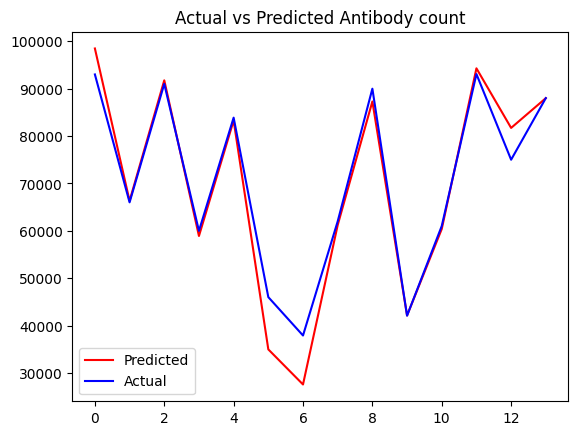

In [90]:
plt.plot(y_pred,color="red",label="Predicted")
plt.plot(y_test,color="blue",label="Actual")
plt.title("Actual vs Predicted Antibody count")
plt.legend()
plt.show()